# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [179]:
import pandas
import numpy as np

data = pandas.read_csv('data.csv', delimiter=',') 
data.describe()
#строки взял у Антона Ныйкина. узнал, что существует библиотека pandas (можно считывать таблицы)

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_universitypast_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,648.000000,639.000000,643.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,50.164869,2.514638,2.306626,1.747304,1.930663,3.930663,3.180277,3.186728,1.497653,2.286159,3.536210,0.409861,0.696456,0.295840,0.876733,0.802773,7.935285
std,254.768848,1.134552,1.099931,2.716138,0.829510,0.955717,1.051093,1.175751,0.924879,1.285764,1.446259,0.492187,0.460143,0.456771,0.328996,0.398212,6.475653
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,10.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000
max,1991.000000,4.000000,4.000000,50.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000


In [ ]:
#хорошо. сломанные признаки
#1) возраст указан не у всех верно (указана дата рождения) age
#2) время пути до школы указано не у всех верно (указаны минуты, а не часы) traveltime
#3) не везде указывали данные (есть ,, | через поиск по ,, я нашел какие признаки не всегда указывали) goout, Dalc, Walc
#4) последние два признака не разделили 


In [182]:
#1)
for i in range(len(data['age'])):
    if data['age'][i] > 130:
        data['age'][i] = np.int64(2023 - data['age'][i])
#2)
for i in range(len(data['traveltime'])):
    if data['traveltime'][i] > 4:
        if data['traveltime'][i] < 15:
            data['traveltime'][i] = np.int64(1)
        elif data['traveltime'][i] < 30:
            data['traveltime'][i] = np.int64(2)
        elif data['traveltime'][i] < 60:
            data['traveltime'][i] = np.int64(3)
        else:
            data['traveltime'][i] = np.int64(4)
#3) - делается в задаче 2
#4)
data = data.rename(columns = {"plans_universitypast_failures": "plans_university"}) #взял у Антона Ныйкина. узнал, что можно переименовывать слотбец таким образом
data['past_failures'] = abs(data['plans_university']) % 10 #все логично, переименованный столбец это число, тогда последний столбец - это последняя цифра от переименованного
data['plans_university'] = np.array([int(str(int(i))[:-1]) for i in data['plans_university']]) #а тут как раз берем только первые, превращая число в строку
data.head
data.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,648.000000,639.000000,643.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,17.032357,2.514638,2.306626,1.568567,1.930663,3.930663,3.180277,3.186728,1.497653,2.286159,3.536210,0.409861,0.696456,0.295840,0.876733,0.802773,0.787365,0.221880
std,2.550817,1.134552,1.099931,0.748660,0.829510,0.955717,1.051093,1.175751,0.924879,1.285764,1.446259,0.492187,0.460143,0.456771,0.328996,0.398212,0.616962,0.593235
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,36.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

__(+1 балл)__

Дополнительно сравните качество замены на среднее по столбцу и на медиану по столбцу


*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [183]:
#4)
for i in data.columns:
    data[i] = data[i].fillna(data[i].mean()) #фукция fillna заменяет значения NaN в колонне, а mean - среднее в колонне
data.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,17.032357,2.514638,2.306626,1.568567,1.930663,3.930663,3.180277,3.186728,1.497653,2.286159,3.536210,0.409861,0.696456,0.295840,0.876733,0.802773,0.787365,0.221880
std,2.550817,1.134552,1.099931,0.748660,0.829510,0.955717,1.051093,1.174843,0.917715,1.279797,1.446259,0.492187,0.460143,0.456771,0.328996,0.398212,0.616962,0.593235
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,36.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [184]:
#нашел в интернете способ нормализации по методу минимакс
for i in data.columns:
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())
data.head()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
0,0.047619,1.00,1.00,0.000000,0.333333,1.00,0.75,0.75,0.00,0.25,1.00,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1,0.095238,1.00,1.00,0.000000,0.000000,1.00,0.50,0.75,0.00,0.25,1.00,0.0,1.0,0.0,1.0,1.0,1.0,0.0
2,0.047619,0.25,0.25,0.333333,0.000000,0.75,1.00,1.00,0.25,0.75,1.00,1.0,0.0,1.0,1.0,1.0,1.0,0.0
3,0.142857,0.25,0.50,0.333333,0.000000,0.50,0.75,0.75,0.25,0.75,0.75,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.095238,0.50,0.25,0.333333,0.333333,0.75,0.25,1.00,0.00,0.25,1.00,0.0,0.0,0.0,1.0,1.0,1.0,0.0


### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

answers = pandas.read_csv('scores.csv')
reg = LinearRegression()
res = cross_validate(reg, data.values[1:], answers.values, cv = 4)
res['test_score']

array([0.21009949, 0.2516627 , 0.15329864, 0.21734865])

### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Попробуйте несколько способов добавления полных данных

In [199]:
#количество посещений
data['attendance'] = np.array([i.count('+') for i in pandas.read_csv('attendance.csv').values.reshape((649,))]) #создаем столбец, в котором описано количество посещений занятий каждого ученика 
ss = np.array([np.int64(0)] * 649);
with open("school_support.txt") as file: #удобное открытие файла
    for x in file.readlines():
        ss[int(x) - 1] = 1
data['school_support'] = ss

for i in data.columns:
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

data.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,attendance,school_support
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.096779,0.628659,0.576656,0.189522,0.310221,0.732666,0.545069,0.546682,0.124413,0.321540,0.634052,0.409861,0.696456,0.295840,0.876733,0.802773,0.893683,0.073960,0.885641,0.104777
std,0.121467,0.283638,0.274983,0.249553,0.276503,0.238929,0.262773,0.293711,0.229429,0.319949,0.361565,0.492187,0.460143,0.456771,0.328996,0.398212,0.308481,0.197745,0.145024,0.306502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.047619,0.500000,0.250000,0.000000,0.000000,0.750000,0.500000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.812500,0.000000
50%,0.095238,0.500000,0.500000,0.000000,0.333333,0.750000,0.500000,0.500000,0.000000,0.250000,0.750000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.937500,0.000000
75%,0.142857,1.000000,0.750000,0.333333,0.333333,1.000000,0.750000,0.750000,0.250000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,attendance,school_support
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.096779,0.628659,0.576656,0.189522,0.310221,0.732666,0.545069,0.546682,0.124413,0.321540,0.634052,0.409861,0.696456,0.295840,0.876733,0.802773,0.893683,0.073960,0.885641,0.104777
std,0.121467,0.283638,0.274983,0.249553,0.276503,0.238929,0.262773,0.293711,0.229429,0.319949,0.361565,0.492187,0.460143,0.456771,0.328996,0.398212,0.308481,0.197745,0.145024,0.306502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.047619,0.500000,0.250000,0.000000,0.000000,0.750000,0.500000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.812500,0.000000
50%,0.095238,0.500000,0.500000,0.000000,0.333333,0.750000,0.500000,0.500000,0.000000,0.250000,0.750000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.937500,0.000000
75%,0.142857,1.000000,0.750000,0.333333,0.333333,1.000000,0.750000,0.750000,0.250000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


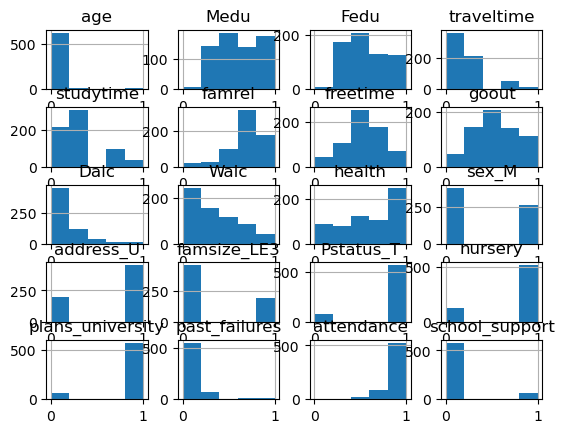

In [200]:
data.hist(bins=5)
data.describe()

__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказаниепосчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

In [3]:
import sklearn
from sklearn import linear_model
regression = linear_model.LinearRegression().fit(data, result) #create model and train it
prediction = #calculate prediction for one object for vector x
error = (prediction - y)**2 #simple error - square error

SyntaxError: invalid syntax (3289234131.py, line 4)

In [1]:
# Your code here
# ...

### Финальное предсказание и отчёт

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

In [ ]:
# Your code here
# ...